# General knowledge about the dataset:

1- The domain area of the dataset is e-commerce in Pakistan. It was collected over the time period from March 2016 to August 2018, capturing half a million e-commerce orders. The dataset was likely collected to understand consumer behavior, trends, and preferences in the Pakistani e-commerce market.

2-The dataset consists of a single CSV file. It contains headers describing the data, such as item details, order status, date of order, SKU, price, quantity, total, category, payment method, and customer ID. The values in the file are separated by commas.

3-The dataset contains five numerical features.Those features are price, ordered quantity,grand total, discount amount and MV which is the price that the customer would have paid if there was no discount

4-The dataset also contains categorical features. These include features like order status, category, payment method, and customer ID. They are nominal variables as there is no inherent order or ranking among them.


| Feature Name            | Explanation  |
|-------------------------|-------------|
| item_id                | Represents the ID of the product |
| status                 | The progress of a purchase |
| created_at             | The date of the purchase |
| sku                    | Represents the name of each product |
| price                  | The cost of each item |
| qty_ordered            | The quantity of the purchased product |
| grand_total            | The total of an order |
| increment_id           | The ID of each order |
| category_name_1        | The name of the category that the product belongs to |
| sales_commission_code  | The code of the commission that is paid |
| discount_amount        | The price that was reduced from that item |
| payment_method         | The way that the purchase was paid |
| MV                     | The price that the customer would have paid if there was no discount |
| Year                   | The year that the purchase was done |
| Month                  | The month that the purchase was done |
| Customer_since         | The first time a customer made a purchase |
| M-Y                    | The month and year of the purchase |
| FY                     | The fiscal year, a one-year period that companies and governments use for financial reporting and budgeting |
| Customer_ID            | The ID of each customer |

In [119]:
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
# Suppress InterpolationWarnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*The test statistic is outside of the range of p-values.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*inferred frequency D will be used.*")


## Data preprocessing 

## 1. Loading the data

In [4]:
import pandas as pd
#importing the data
df=pd.read_csv("/Users/aniaboutarene/Desktop/Ecommerce.csv")
#displaying the data
df

item_id          status created_at  \
0        211131.0        complete   7/1/2016   
1        211133.0        canceled   7/1/2016   
2        211134.0        canceled   7/1/2016   
3        211135.0        complete   7/1/2016   
4        211136.0  order_refunded   7/1/2016   
...           ...             ...        ...   
1048570       NaN             NaN        NaN   
1048571       NaN             NaN        NaN   
1048572       NaN             NaN        NaN   
1048573       NaN             NaN        NaN   
1048574       NaN             NaN        NaN   

                                                       sku   price  \
0                                        kreations_YI 06-L  1950.0   
1        kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0   
2                                       Ego_UP0017-999-MR0  2450.0   
3                                           kcc_krone deal   360.0   
4                                              BK7010400AG   555.0   
...                                                    ...     ...   
1048570                                                NaN     NaN   
1048571                                                NaN     NaN   
1048572                                                NaN     NaN   
1048573                                                NaN     NaN   
1048574                                                NaN     NaN   

         qty_ordered  grand_total increment_id    category_name_1  \
0                1.0       1950.0    100147443    Women's Fashion   
1                1.0        240.0    100147444  Beauty & Grooming   
2                1.0       2450.0    100147445    Women's Fashion   
3                1.0         60.0    100147446  Beauty & Grooming   
4                2.0       1110.0    100147447            Soghaat   
...              ...          ...          ...                ...   
1048570          NaN          NaN          NaN                NaN   
1048571          NaN          NaN          NaN                NaN   
1048572          NaN          NaN          NaN                NaN   
1048573          NaN          NaN          NaN                NaN   
1048574          NaN          NaN          NaN                NaN   

        sales_commission_code  ...  Month Customer Since     M-Y    FY  \
0                          \N  ...    7.0         2016-7  7-2016  FY17   
1                          \N  ...    7.0         2016-7  7-2016  FY17   
2                          \N  ...    7.0         2016-7  7-2016  FY17   
3                 R-FSD-52352  ...    7.0         2016-7  7-2016  FY17   
4                          \N  ...    7.0         2016-7  7-2016  FY17   
...                       ...  ...    ...            ...     ...   ...   
1048570                   NaN  ...    NaN            NaN     NaN   NaN   
1048571                   NaN  ...    NaN            NaN     NaN   NaN   
1048572                   NaN  ...    NaN            NaN     NaN   NaN   
1048573                   NaN  ...    NaN            NaN     NaN   NaN   
1048574                   NaN  ...    NaN            NaN     NaN   NaN   

        Customer ID  Unnamed: 21  Unnamed: 22 Unnamed: 23 Unnamed: 24  \
0               1.0          NaN          NaN         NaN         NaN   
1               2.0          NaN          NaN         NaN         NaN   
2               3.0          NaN          NaN         NaN         NaN   
3               4.0          NaN          NaN         NaN         NaN   
4               5.0          NaN          NaN         NaN         NaN   
...             ...          ...          ...         ...         ...   
1048570         NaN          NaN          NaN         NaN         NaN   
1048571         NaN          NaN          NaN         NaN         NaN   
1048572         NaN          NaN          NaN         NaN         NaN   
1048573         NaN          NaN          NaN         NaN         NaN   
1048574         NaN          NaN          NaN         NaN         NaN  

In [6]:
df.shape

(1048575, 26)

## 2. Data cleaning

From the general review of the head of the data and from the info shown above,we deduce that the 5 last columns are extra and some rows contain only nan values.
CSV stands for comma separated values. Every comma represents a new column, it's quite common to unintentionally add a comma and thus add a new column that is empty


In [8]:
#dropping the 5 columns 
df=df.dropna(how="all", axis=1)
#dropping the extra rows
df=df.dropna(how="all", axis=0)


In [9]:
#we notice that the column "created_at" is equal to "Working Date", let's check if it's correct or not
df["created_at"].equals(df["Working Date"])

True

In [10]:
#the two columns are equal, we drop one of them
df.drop("Working Date",axis=1,inplace=True)
df


item_id          status created_at  \
0       211131.0        complete   7/1/2016   
1       211133.0        canceled   7/1/2016   
2       211134.0        canceled   7/1/2016   
3       211135.0        complete   7/1/2016   
4       211136.0  order_refunded   7/1/2016   
...          ...             ...        ...   
584519  905204.0             cod  8/28/2018   
584520  905205.0      processing  8/28/2018   
584521  905206.0      processing  8/28/2018   
584522  905207.0      processing  8/28/2018   
584523  905208.0      processing  8/28/2018   

                                                      sku     price  \
0                                       kreations_YI 06-L    1950.0   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...     240.0   
2                                      Ego_UP0017-999-MR0    2450.0   
3                                          kcc_krone deal     360.0   
4                                             BK7010400AG     555.0   
...                                                   ...       ...   
584519                                WOFSCE5AE00357AECDE     699.0   
584520                                MATHUA5AF70A7D1E50A   35599.0   
584521                                MATSAM5B6D7208C6D30  129999.0   
584522                                MATSAM5B1509B4696EA   87300.0   
584523                                MATSAM5B10F91A9B6AB  108640.0   

        qty_ordered  grand_total increment_id    category_name_1  \
0               1.0       1950.0    100147443    Women's Fashion   
1               1.0        240.0    100147444  Beauty & Grooming   
2               1.0       2450.0    100147445    Women's Fashion   
3               1.0         60.0    100147446  Beauty & Grooming   
4               2.0       1110.0    100147447            Soghaat   
...             ...          ...          ...                ...   
584519          1.0        849.0    100562385    Women's Fashion   
584520          1.0      35899.0    100562386  Mobiles & Tablets   
584521          2.0     652178.0    100562387  Mobiles & Tablets   
584522          2.0     652178.0    100562387  Mobiles & Tablets   
584523          2.0     652178.0    100562387  Mobiles & Tablets   

       sales_commission_code  discount_amount payment_method BI Status  \
0                         \N              0.0            cod     #REF!   
1                         \N              0.0            cod     Gross   
2                         \N              0.0            cod     Gross   
3                R-FSD-52352            300.0            cod       Net   
4                         \N              0.0            cod     Valid   
...                      ...              ...            ...       ...   
584519                   NaN              0.0            cod     Valid   
584520                   NaN              0.0    bankalfalah     Gross   
584521                   NaN              0.0    bankalfalah     Gross   
584522                   NaN              0.0    bankalfalah     Gross   
584523                   NaN              0.0    bankalfalah     Gross   

              MV     Year  Month Customer Since     M-Y    FY  Customer ID  
0          1,950   2016.0    7.0         2016-7  7-2016  FY17          1.0  
1            240   2016.0    7.0         2016-7  7-2016  FY17          2.0  
2          2,450   2016.0    7.0         2016-7  7-2016  FY17          3.0  
3            360   2016.0    7.0         2016-7  7-2016  FY17          4.0  
4          1,110   2016.0    7.0         2016-7  7-2016  FY17          5.0  
...           ...     ...    ...            ...     ...   ...          ...  
584519       699   2018.0    8.0         2018-8  8-2018  FY19     115320.0  
584520    35,599   2018.0    8.0         2018-8  8-2018  FY19     115326.0  
584521   259,998   2018.0    8.0         2018-7  8-2018  FY19     113474.0  
584522   174,600   2018.0    8.0         2018-7  8-2018  FY19     113474.0  
584523   217,280   2018.0    8.0      

We also drop the columns that aren't important such as FY (fiscal year). Year, and Month because M-Y (month-year) is sufficient for our analysis. BI Status and sales commission code are being dropped because they are not used in our analysis and are not relevant to our current objectives.

In [12]:
columns_to_drop = ['FY', 'Year', 'Month', 'BI Status', 'sales_commission_code']
df.drop(columns=columns_to_drop, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584524 non-null  float64
 1   status           584509 non-null  object 
 2   created_at       584524 non-null  object 
 3   sku              584504 non-null  object 
 4   price            584524 non-null  float64
 5   qty_ordered      584524 non-null  float64
 6   grand_total      584524 non-null  float64
 7   increment_id     584524 non-null  object 
 8   category_name_1  584360 non-null  object 
 9   discount_amount  584524 non-null  float64
 10  payment_method   584524 non-null  object 
 11   MV              584524 non-null  object 
 12  Customer Since   584513 non-null  object 
 13  M-Y              584524 non-null  object 
 14  Customer ID      584513 non-null  float64
dtypes: float64(6), object(9)
memory usage: 71.4+ MB


For a better comprehension of the columns, we rename them

In [16]:
df.rename(columns={'M-Y': 'Month-Year',
                   'status': 'Order_Status',
                   'sku': 'Product_Name',
                   'category_name_1': 'Category_Name',
                   'discount_amount': 'Discount_Amount',
                   ' MV ': 'Original_Price'}, inplace=True)


Now let's look for the number of the missing values in each attribute and proceed to fix before making any analysis

In [20]:
df.isnull().sum()

item_id              0
Order_Status        15
created_at           0
Product_Name        20
price                0
qty_ordered          0
grand_total          0
increment_id         0
Category_Name      164
Discount_Amount      0
payment_method       0
Original_Price       0
Customer Since      11
Month-Year           0
Customer ID         11
dtype: int64


Because the dataset has enough instances, we can afford to drop the rows that contain Nan values

In [25]:
df.dropna(inplace=True)


Let's check again for any missing value

In [31]:
df.isnull().sum()

item_id            0
Order_Status       0
created_at         0
Product_Name       0
price              0
qty_ordered        0
grand_total        0
increment_id       0
Category_Name      0
Discount_Amount    0
payment_method     0
Original_Price     0
Customer Since     0
Month-Year         0
Customer ID        0
dtype: int64

For a more thourough exploration of the data, let's check unique values of some important columns

In [35]:
df["payment_method"].value_counts()

payment_method
cod                  271770
Payaxis               97640
Easypay               82893
jazzwallet            35145
easypay_voucher       31175
bankalfalah           23057
jazzvoucher           15633
Easypay_MA            14026
customercredit         7554
apg                    1758
ublcreditcard           882
cashatdoorstep          732
mcblite                 723
mygateway               669
internetbanking         472
productcredit           125
marketingexpense         45
financesettlement        15
Name: count, dtype: int64

In [37]:
df["Category_Name"].value_counts()

Category_Name
Mobiles & Tablets     115709
Men's Fashion          92218
Women's Fashion        59720
Appliances             52413
Superstore             43611
Beauty & Grooming      41493
Soghaat                34011
Others                 29208
Home & Living          26504
Entertainment          26322
Health & Sports        17502
Kids & Baby            16489
Computing              15933
\N                      7833
School & Education      3478
Books                   1870
Name: count, dtype: int64

In [39]:
 df["Order_Status"].value_counts()

Order_Status
complete          233684
canceled          201127
received           77284
order_refunded     59498
refund              8020
cod                 2854
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: count, dtype: int64


It's observed that missing values may not always be detected solely by using the isnull() function. Different representations such as specific placeholders might exist (in this context \N ), leading to undetected missing values.

the current strategy remains focused on dropping instances with missing values without replacement. This approach aims to maintain dataset integrity and prevent potential bias that could arise from imputing missing values.

In [43]:
df = df[df['Order_Status'] != '\\N']
# Drop rows with "\N" in the Category_Name column
df = df[df['Category_Name'] != '\\N']

To ensure consistency and simplify analysis, the values in the "Order_Status" column are normalized by merging synonymous terms. For instance, values like "refund" and "order_refunded" are mapped to a single normalized value, such as "refund". "received" could as well be mapped to "completed".

In [46]:
#let's give them one synonym only
df.Order_Status = df.Order_Status.replace({  "complete":"completed",
                                             "received": "completed",
                                             "order_refunded": "refund",
                                             "cod": "cash on door",
                                             "paid": "completed",
                                             "closed": "completed",
                                             "payment_review":"pending",
                                             "processing":"pending",
                                             "holded": "pending",
                                             "pending_paypal": "pending",
                                             "exchange": "completed"
})
print("new values:")

print(df["Order_Status"].value_counts())

new values:
Order_Status
completed       309261
canceled        197970
refund           66213
cash on door      2851
pending            176
fraud               10
Name: count, dtype: int64


In [47]:
df['Discount_Amount'].max()

90300.0

In [50]:
df['Discount_Amount'].min()

-599.5


There's an inconsistency when it comes to the representation of the discounted amount, some values are negative. Let's make all the values positive

In [53]:
df['Discount_Amount']= df['Discount_Amount'].abs()


# Questions about the business 


Q1: What is the proportion of completed orders that belong to the category Women's Fashion

In [57]:
orders_grouped = df.groupby(["Category_Name", "Order_Status"]).size().reset_index(name="count")
completed_womens_fashion_orders = orders_grouped[(orders_grouped["Order_Status"] == 'completed') & (orders_grouped["Category_Name"] == "Women's Fashion")]
total_completed_orders = orders_grouped[orders_grouped["Order_Status"] == "completed"]["count"].sum()
proportion_completed_womens_fashion_orders = (completed_womens_fashion_orders["count"] / total_completed_orders) * 100

print("Proportion of completed orders that belong to the category Women's Fashion:", proportion_completed_womens_fashion_orders.values[0])

Proportion of completed orders that belong to the category Women's Fashion: 10.990393227726743


The obtained result indicates that approximately 10.99% of completed orders belong to the category "Women's Fashion" .This proportion suggests a notable but not dominant presence of women's fashion items among completed orders,potentially indicating a diverse customer base with varied purchasing preferences across different product categories

Q2: What is the proportion of completed orders that belong to the paying method Easypay

In [61]:
payment_grouped = df.groupby(["payment_method", "Order_Status"]).size().reset_index(name="count")
completed_Easypay_orders = payment_grouped[(payment_grouped["Order_Status"] == 'completed') & (payment_grouped["payment_method"] == "Easypay")]
total_completed_orders = payment_grouped[payment_grouped["Order_Status"] == "completed"]["count"].sum()
proportion_completed_Easypay_orders = (completed_Easypay_orders["count"] / total_completed_orders) * 100

print("Proportion of completed orders that belong to the paying method Easypay:", proportion_completed_Easypay_orders.values[0])

Proportion of completed orders that belong to the paying method Easypay: 8.88925535389202


8.89% of completed orders were paid using the method "Easypay." This suggests a moderate but not dominant usage of Easypay among customers for completing their orders, different methods of payment exist and we will explore which one is the most famous in the next question

# A picture is worth a thousand words


## 1. number of orders per month

Text(0, 0.5, 'Month-Year')

<Figure size 2000x700 with 0 Axes>

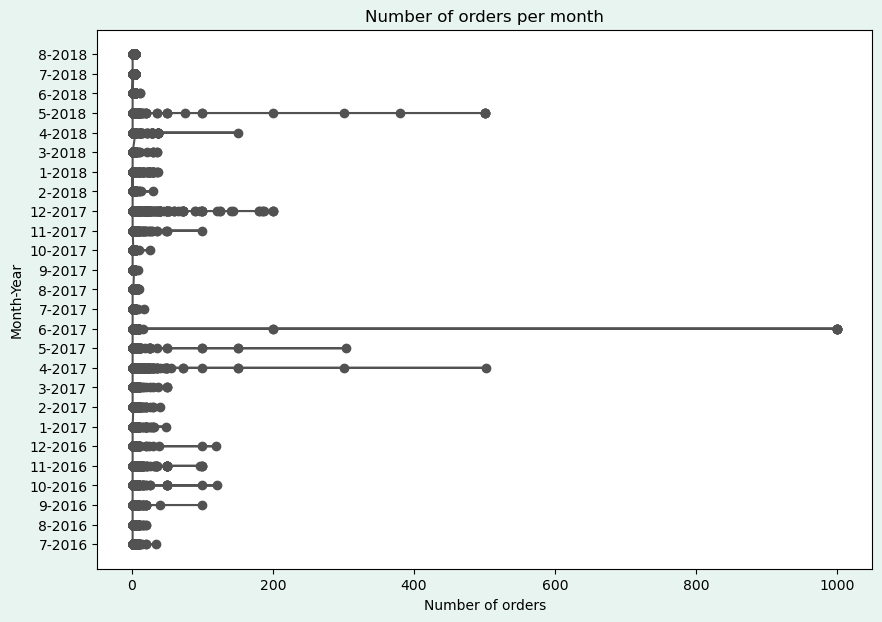

In [66]:
import matplotlib.pyplot as plt
import seaborn as sea
plt.figure(figsize=(20,7))
fig, ax = plt.subplots(figsize=(10, 7), facecolor='#e8f4f0')
plt.plot("qty_ordered", "Month-Year",data=df, marker='o',color="#525252")
plt.title("Number of orders per month")
plt.xlabel("Number of orders")
plt.ylabel("Month-Year")

The data exhibits irregular order volumes, with some months having dense clusters of orders while others show fewer transactions. This indicates inconsistent demand patterns, which might be linked to factors like economic conditions, seasonality, or business strategies.

There are significant spikes in the number of orders around mid-2017 and early 2018, suggesting that these were high-demand periods. This could indicate seasonal trends, marketing campaigns, or product launches driving higher sales.

## 2. category of the most ordered items

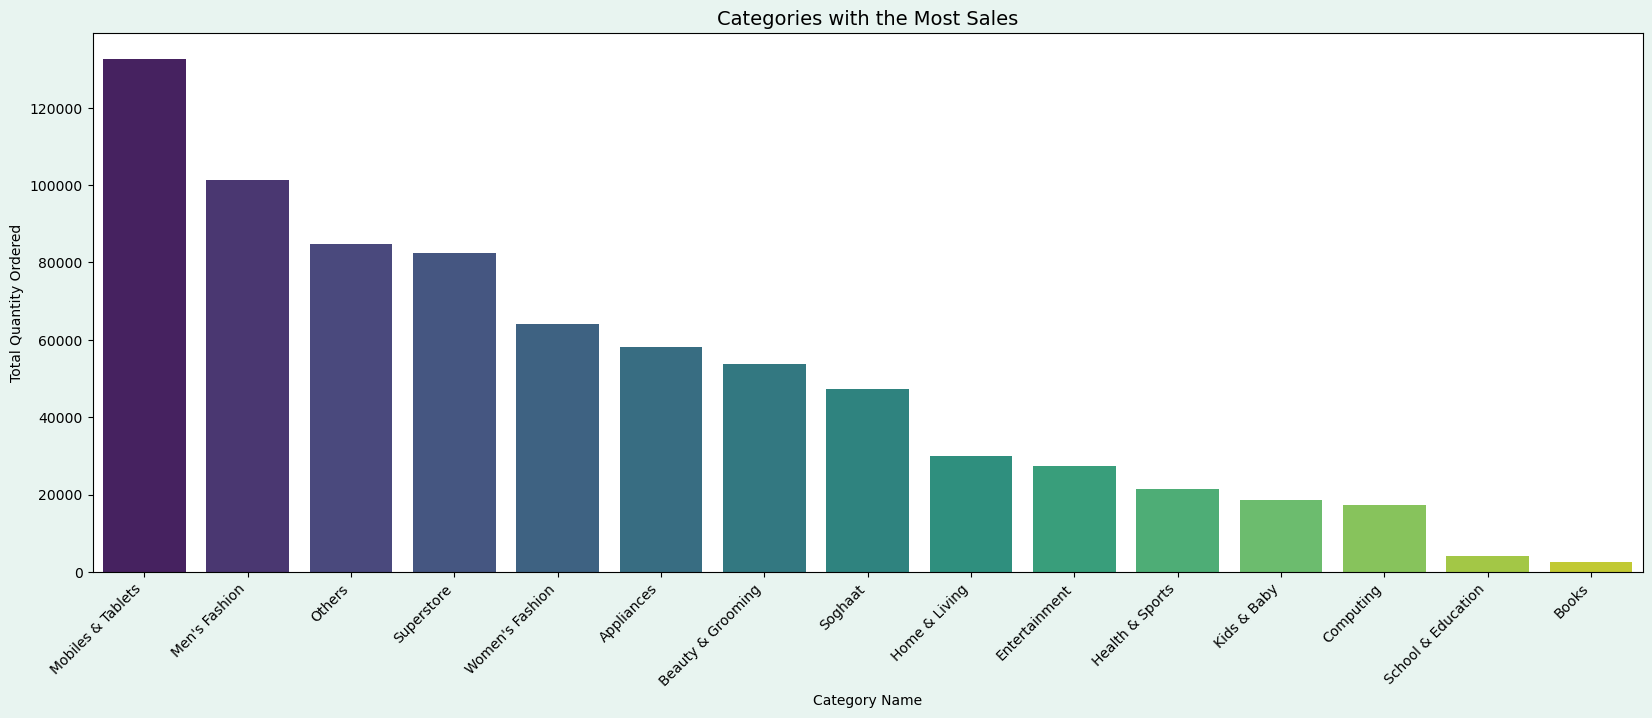

In [69]:
# Group by category and sum the ordered quantity
df2 = df.groupby("Category_Name", as_index=False)["qty_ordered"].sum()

# Sort by most ordered categories
df2 = df2.sort_values("qty_ordered", ascending=False)

# Plot the histogram
plt.figure(figsize=(20, 7), facecolor="#e8f4f0")
sea.barplot(x="Category_Name", y="qty_ordered", data=df2, palette="viridis")

# Format the chart
plt.xticks(rotation=45, ha="right")
plt.title("Categories with the Most Sales", fontsize=14)
plt.xlabel("Category Name")
plt.ylabel("Total Quantity Ordered")
plt.show()

Mobiles & Tablets has the highest sales, significantly leading other categories. This suggests strong consumer demand for electronics, possibly driven by frequent upgrades, new model releases, or high-value purchases.

Computing, School & Education, and Books have the lowest sales. This may suggest that either these products are purchased less frequently or that customers prefer alternative purchasing channels (e.g., direct from publishers, digital formats).

**Possible Business Insights:**

Books and School & Education:

Eliminate or reduce focus if these categories consistently underperform and have low profitability. This would free up resources for higher-selling products.

Reposition and promote through targeted marketing (e.g., back-to-school campaigns for education, exclusive book deals, or digital alternatives).

## 3. Order status of the categories category

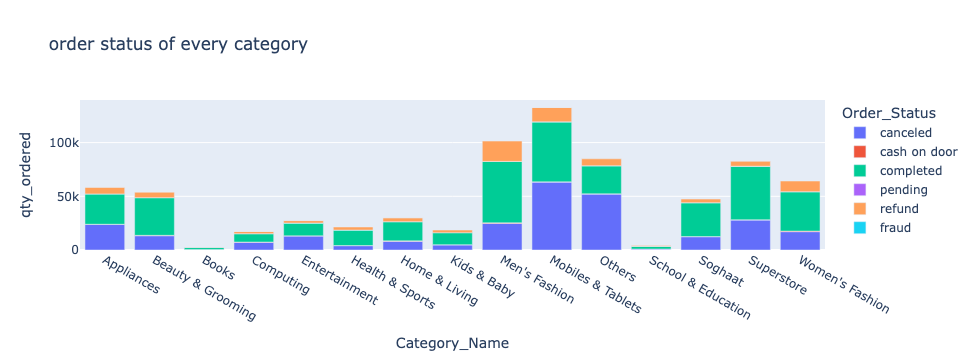

In [74]:
import plotly.express as px
status=df.groupby(["Category_Name","Order_Status"])["qty_ordered"].sum().reset_index()
px.bar(status,x="Category_Name",y="qty_ordered",color="Order_Status",title="order status of every category")


## 4. price vs discount

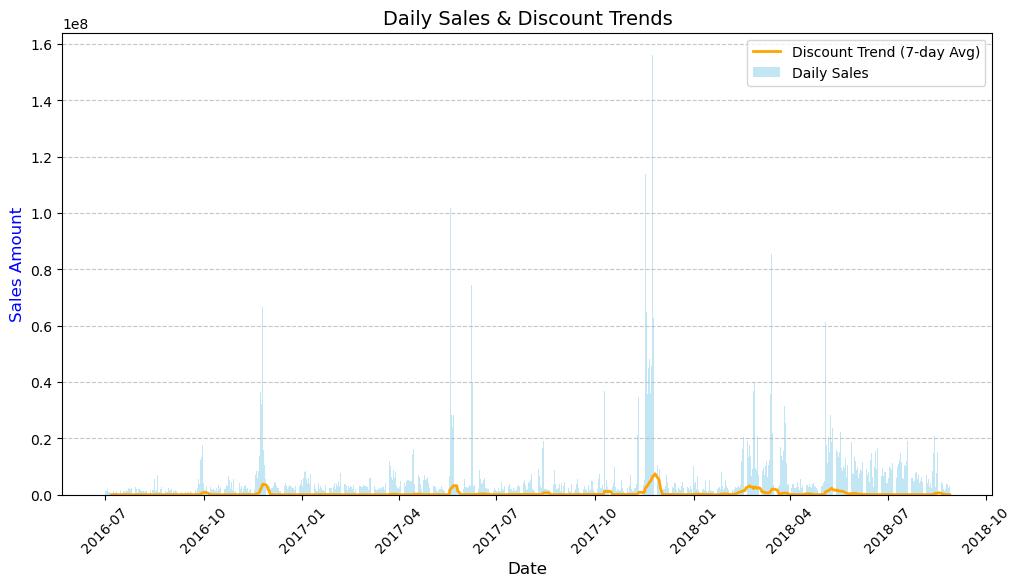

In [79]:
# Ensure 'created_at' is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
# Aggregate daily sales and discounts
daily_sales = df.groupby(df['created_at'].dt.date).agg({
    'grand_total': 'sum',
    'Discount_Amount': 'sum'
}).reset_index()

# Compute rolling average for trends
daily_sales['sales_avg'] = daily_sales['grand_total'].rolling(window=7).mean()
daily_sales['discount_avg'] = daily_sales['Discount_Amount'].rolling(window=7).mean()
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(daily_sales['created_at'], daily_sales['grand_total'], color='skyblue', alpha=0.5, label='Daily Sales')
ax.plot(daily_sales['created_at'], daily_sales['discount_avg'], color='orange', linewidth=2, label='Discount Trend (7-day Avg)')
ax.set_title("Daily Sales & Discount Trends", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Sales Amount", fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

The discount trend (orange line) remains relatively low and stable, with minor increases corresponding to some of the sales spikes.
The largest sales peaks do not always coincide with high discount periods, which may indicate that other factors (e.g., seasonal demand or product launches) are driving these sales.
If sales are strong without high discounts, reducing promotional dependency further to maximize profit margins might be considered.

# Predictive Modeling

## 1. RFM customer segmentation with K-means 

The RFM (Recency, Frequency, Monetary) model is a widely used method in marketing for customer segmentation. It helps businesses identify which customers are more likely to respond to future offers by analyzing three key factors:

Recency (R): How recently a customer made a purchase. The more recent the purchase, the more likely the customer is to respond to future marketing.

Frequency (F): How often a customer makes a purchase. Customers who purchase more frequently are often more engaged with the business.

Monetary (M): How much money a customer spends. Customers who spend more are considered more valuable.

1- Recency

In [86]:
#converting created_at to datetime format
df["created_at"] = pd.to_datetime(df["created_at"])
#define for each customer, the date of his last purchase
recency= df.groupby(by='Customer ID',as_index=False)["created_at"].max()
recency.columns = ['Customer ID', 'LastPurchaseDate']
#set the reference date as the latest date in the dataset
recent_date = recency['LastPurchaseDate'].max()
#define recency of the puchase for each cutomer
recency['Recency'] = recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
recency

Customer ID LastPurchaseDate  Recency
0               1.0       2016-07-01      788
1               2.0       2016-11-25      641
2               3.0       2017-05-19      466
3               4.0       2018-08-27        1
4               5.0       2016-07-01      788
...             ...              ...      ...
114207     115322.0       2018-08-28        0
114208     115323.0       2018-08-28        0
114209     115324.0       2018-08-28        0
114210     115325.0       2018-08-28        0
114211     115326.0       2018-08-28        0

[114212 rows x 3 columns]

2- Frequency

In [89]:
#define each customer the frequency of his purchases
frequency = df.groupby("Customer ID").size().reset_index(name='frequency')
frequency

Customer ID  frequency
0               1.0          1
1               2.0          2
2               3.0          5
3               4.0        415
4               5.0          1
...             ...        ...
114207     115322.0          2
114208     115323.0          1
114209     115324.0          1
114210     115325.0          2
114211     115326.0          1

[114212 rows x 2 columns]

3- Monetary

In [92]:
#the sum of all the money spent
monetary = df.groupby("Customer ID")["grand_total"].sum().reset_index(name='monetary')
monetary

Customer ID   monetary
0               1.0     1950.0
1               2.0      510.0
2               3.0     7430.0
3               4.0  2452551.6
4               5.0     1110.0
...             ...        ...
114207     115322.0     2596.0
114208     115323.0    44499.0
114209     115324.0      549.0
114210     115325.0     1199.0
114211     115326.0    35899.0

[114212 rows x 2 columns]

In [94]:
#joining the recency, freqeuncy, and monetary to create the rfm dataframe
RFM=recency.merge(frequency, on='Customer ID')
RFM =RFM.merge(monetary, on='Customer ID').drop( columns='LastPurchaseDate')
RFM.head()

Customer ID  Recency  frequency   monetary
0          1.0      788          1     1950.0
1          2.0      641          2      510.0
2          3.0      466          5     7430.0
3          4.0        1        415  2452551.6
4          5.0      788          1     1110.0

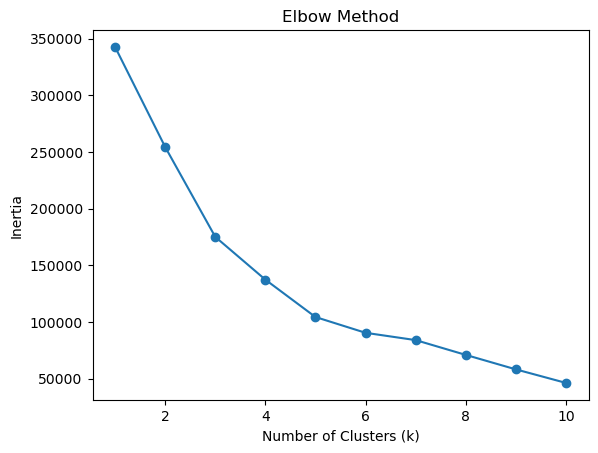

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df_rfm_no_id = RFM.drop(columns=["Customer ID"])
# Normalize the data using StandardScaler (scaling to mean 0, variance 1)
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm_no_id)
#choosing the optimal number of clusters
# Elbow Method to find the optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. k
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [97]:
# Apply KMeans clustering ( k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
RFM["Cluster"] = kmeans.fit_predict(df_rfm_scaled)
RFM

Customer ID  Recency  frequency   monetary  Cluster
0               1.0      788          1     1950.0        0
1               2.0      641          2      510.0        0
2               3.0      466          5     7430.0        0
3               4.0        1        415  2452551.6        2
4               5.0      788          1     1110.0        0
...             ...      ...        ...        ...      ...
114207     115322.0        0          2     2596.0        1
114208     115323.0        0          1    44499.0        1
114209     115324.0        0          1      549.0        1
114210     115325.0        0          2     1199.0        1
114211     115326.0        0          1    35899.0        1

[114212 rows x 5 columns]

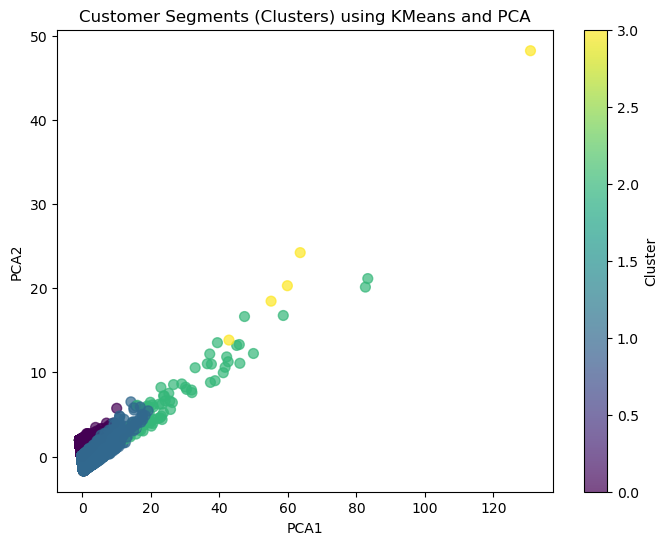

In [100]:
from sklearn.decomposition import PCA
# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
df_rfm_pca = pca.fit_transform(df_rfm_scaled)

# Create a DataFrame with the PCA results and cluster labels
df_pca = pd.DataFrame(df_rfm_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = RFM["Cluster"]

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PCA1"], df_pca["PCA2"], c=df_pca["Cluster"], cmap='viridis', s=50, alpha=0.7)
plt.title("Customer Segments (Clusters) using KMeans and PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.show()

The scatter plot represents customer segments in a 2D space
The color bar on the right indicates cluster labels (0, 1, 2, 3).
There is a concentration of points in the lower-left corner (suggesting many customers have similar RFM scores).
The clusters seem somewhat overlapping but still distinguishable.

This segmentation helps businesses tailor marketing strategies:

High-value customers (yellow/green clusters) → Loyalty programs, premium offers.

Low-value customers (dark purple) → Re-engagement campaigns, promotions.

Middle-tier customers → Personalized marketing efforts.

## 2. Grand Total prediction


In [104]:
df['created_at'] = pd.to_datetime(df['created_at'])
df3 = df.groupby(df['created_at'])['grand_total'].sum().reset_index()
df3.set_index('created_at', inplace=True)
df3.head()

grand_total
created_at             
2016-07-01   1286453.75
2016-07-02   1394837.48
2016-07-03   2143719.88
2016-07-04   1094068.25
2016-07-05    910507.50

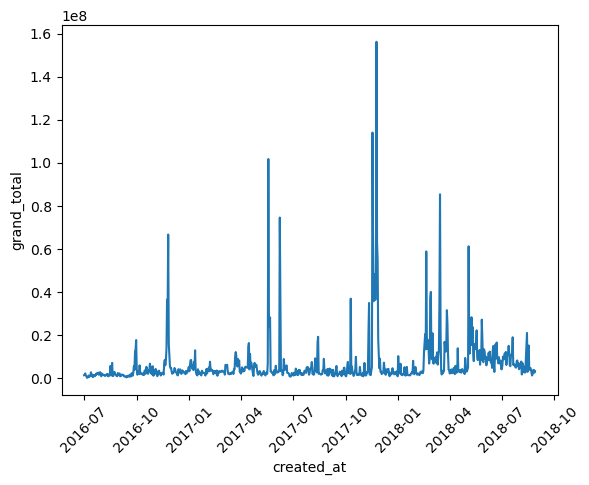

In [106]:
import seaborn as sea
sea.lineplot(x = "created_at" , y = "grand_total",data=df3 )
plt.xticks(rotation=45)
plt.show()

The amplitude of fluctuations seems to increase over time, especially after 2017.

There are sharp spikes at multiple points (e.g., late 2016, mid-2017, late 2017, early 2018). These could indicate seasonal patterns (e.g., sales spikes during holidays) or outliers (unexpected high activity). The spikes occur at almost regular interval, this might indicate seasonality. let's invistigate this further


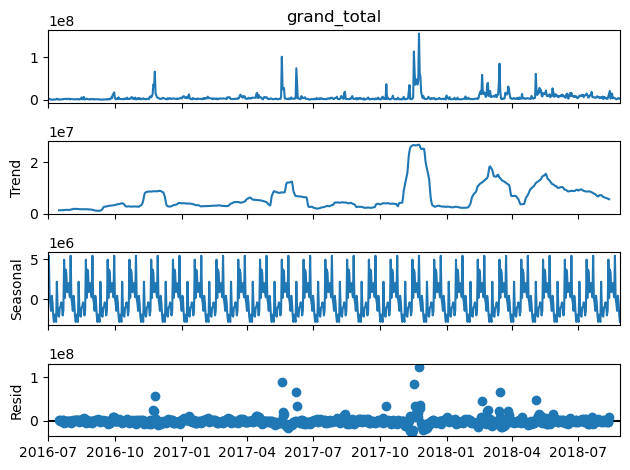

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3['grand_total'], model='additive', period=30)  # Adjust period as needed
# Plot the decomposition
result.plot()
plt.show()

The seasonal component shows a repeating pattern, confirming a weekly seasonality in the data. Therefore, we will use a SARIMA model to forecast the grand total

Checking Whether the data is stationary 

In [121]:
from statsmodels.tsa.stattools import adfuller, kpss
results = adfuller(df3['grand_total'])
print('ADF Statistics:',results[0])
print('p-value:',results[1])
print('Critical Values: ')
for key, value in results[4].items():
    print(key,'%:',value)


ADF Statistics: -6.734912390576265
p-value: 3.2257910953282855e-09
Critical Values: 
1% %: -3.438750669890019
5% %: -2.8652477937238703
10% %: -2.56874438754281


P-value<0.5, so the dataset seems stationary (Mean, Variance, Autocorrelation are constant), however we can make it even more stationary


Since the p-value is in the limit, let’s also use a Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test to verify our assumption. This test examines the presence of a trend or other forms of non-stationarity.

In [125]:
from statsmodels.tsa.stattools import kpss
result = kpss(df3['grand_total'])
print('kpss Statistics:',results[0])
print('p-value:',results[1])
print('Critical Values: ')
for key, value in results[4].items():
    print(key,'%:',value)


kpss Statistics: -6.734912390576265
p-value: 3.2257910953282855e-09
Critical Values: 
1% %: -3.438750669890019
5% %: -2.8652477937238703
10% %: -2.56874438754281


ADF test suggests the series is stationary, however, p-value<0.5, the KPSS test suggests that data isn't stationary.
This contradiction means that data might be trend-stationary. let's fix it.

In [130]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
# --- Normalize or Standardize the Data ---
# Choose one of the methods below

# 1. Normalization (Min-Max Scaling)
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
df3_normalized = df3.copy()
df3_normalized['grand_total'] = scaler_minmax.fit_transform(df3[['grand_total']])

# 2. Standardization (Z-Score)
scaler_standard = StandardScaler()
df3_standardized = df3.copy()
df3_standardized['grand_total'] = scaler_standard.fit_transform(df3[['grand_total']])

# --- Apply Differencing and Log Transform ---
# You can apply either on the normalized or standardized data based on your choice
df_stationary = df3_normalized['grand_total'].diff().dropna()  # Use df3_standardized if you prefer standardization

# Log transformation for Stationarity
indexeddataset_logscale = np.log(df3_normalized['grand_total'])  # Apply to normalized data

# Create differenced log-transformed data
datasetLogDiffShifting = indexeddataset_logscale - indexeddataset_logscale.shift()
datasetLogDiffShifting.dropna(inplace=True)

# Moving Average and Moving Std
movingaverage = indexeddataset_logscale.rolling(window=12).mean()
movingstd = indexeddataset_logscale.rolling(window=12).std()

# Dataset minus moving average for detrending
datasetlogscaleminusmovingaverage = indexeddataset_logscale - movingaverage
datasetlogscaleminusmovingaverage.dropna(inplace=True)

# --- KPSS and ADF Test ---
kpss_result = kpss(datasetlogscaleminusmovingaverage) 
print("KPSS Test Statistic:", kpss_result[0], "p-value:", kpss_result[1])
adf_result = adfuller(datasetlogscaleminusmovingaverage)
print("ADF Test Statistic:", adf_result[0], "p-value:", adf_result[1])


KPSS Test Statistic: 0.033521288717343285 p-value: 0.1
ADF Test Statistic: -10.652485781638482 p-value: 4.622942974165005e-19


P-value > 0.05  therefore it confirms the stationarity of the data. This is telling us that the d parameter will be 0


In [133]:
datasetlogscaleminusmovingaverage = pd.Series(datasetlogscaleminusmovingaverage)
new_dataset = datasetlogscaleminusmovingaverage.to_frame()
new_dataset.head()

grand_total
created_at             
2016-07-18     0.700003
2016-07-19     0.287010
2016-07-20    -0.146165
2016-07-21     0.541315
2016-07-22     0.292129

To build the best SARIMA model, we need to balance prediction power and simplicity to prevent overfitting. This process involves grid search, where we test different parameter combinations and evaluate their performance using the Akaike Information Criterion (AIC).

Key Concepts:

**AIC (Akaike Information Criterion)**: Measures model quality by considering both fit and complexity. A lower AIC means a better model.

**Grid Search**: Iterates through reasonable parameter values, fits models, and selects the one with the lowest AIC.

**Model Convergence**: Only keep models that successfully converge—check z-values to discard models with infinite values.

By following this approach, we ensure the model is accurate yet not overly complex, leading to better generalization on new data.

A SARIMA model is defined by 7 parameters as we mentioned before: (p, d, q)(P, D, Q, m) We know that our model does not need differencing to be stationary, therefore d will most likely be 0. Also, we know the seasonal period of our data is 7, so m will be 7.

In [137]:
# Split into training and testing
train_df = new_dataset['grand_total'].iloc[:680] 
test_df = new_dataset['grand_total'].iloc[680:] 

Let’s then fit the model with the optimal parameters and check its summary.



A good model fit is indicated when:

The standardized residuals appear as random noise with zero mean and constant variance.

The histogram and KDE of the residuals resemble a normal distribution.

The Normal Q-Q plot shows most points lying along the straight line.

The ACF (correlogram) shows all lags within the confidence bands.

Order: (0, 1, 0), Seasonal Order: (0, 0, 0, 7), AIC: 1443.9179844755765
Order: (0, 1, 0), Seasonal Order: (0, 0, 0, 14), AIC: 1443.9179844755765
Order: (0, 1, 0), Seasonal Order: (0, 0, 1, 7), AIC: 1413.6210754283939
Order: (0, 1, 0), Seasonal Order: (0, 0, 1, 14), AIC: 1419.4898150160461
Order: (0, 1, 0), Seasonal Order: (1, 0, 0, 7), AIC: 1412.6057387756457
Order: (0, 1, 0), Seasonal Order: (1, 0, 0, 14), AIC: 1420.373584733868
Order: (0, 1, 0), Seasonal Order: (1, 0, 1, 7), AIC: 1400.0589247755504
Order: (0, 1, 0), Seasonal Order: (1, 0, 1, 14), AIC: 1410.2722752661289
Order: (0, 1, 1), Seasonal Order: (0, 0, 0, 7), AIC: 1385.3773135680685
Order: (0, 1, 1), Seasonal Order: (0, 0, 0, 14), AIC: 1385.3773135680685
Order: (0, 1, 1), Seasonal Order: (0, 0, 1, 7), AIC: 1363.848995429927
Order: (0, 1, 1), Seasonal Order: (0, 0, 1, 14), AIC: 1360.6616566367093
Order: (0, 1, 1), Seasonal Order: (1, 0, 0, 7), AIC: 1364.1741631669295
Order: (0, 1, 1), Seasonal Order: (1, 0, 0, 14), AIC: 1362.4

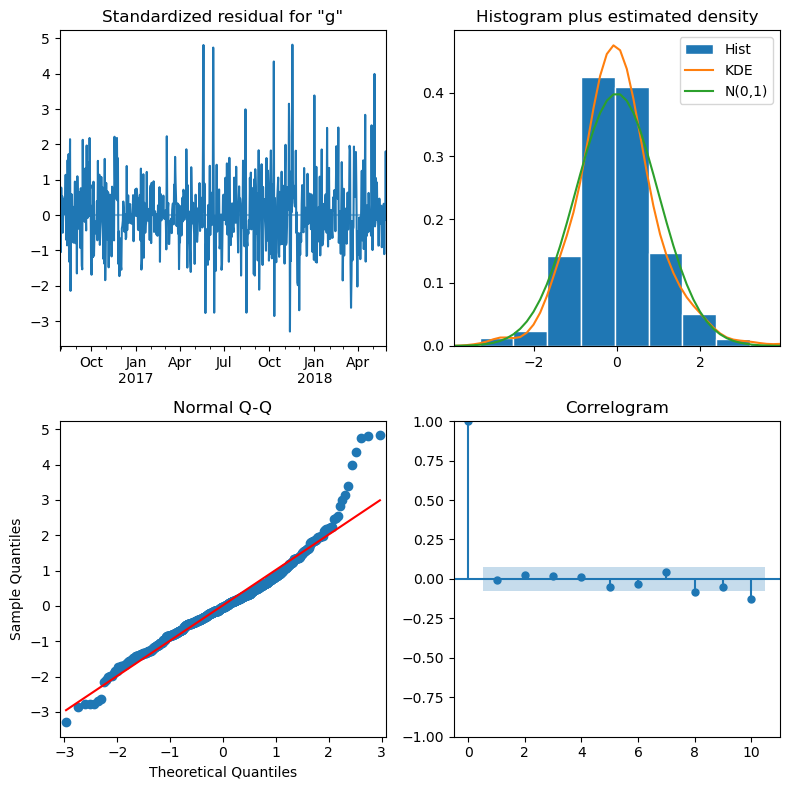

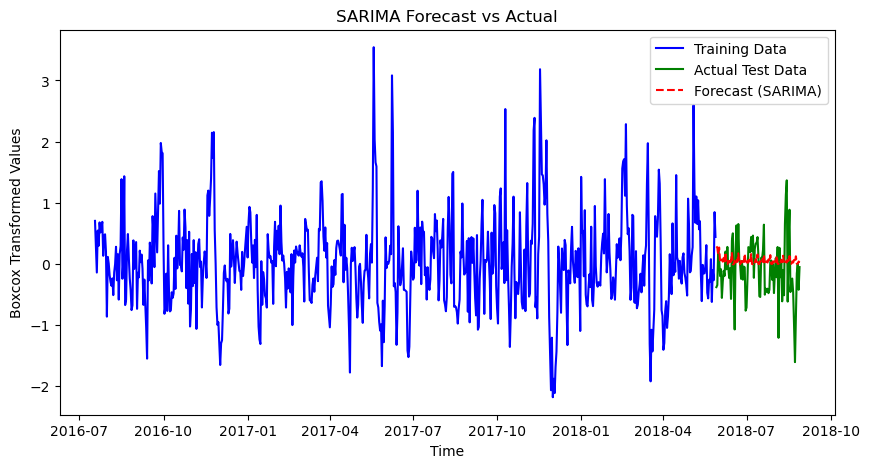

MAE: 0.37543899422099797


In [141]:
import itertools
import math
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure the training DataFrame index is datetime
train_df.index = pd.to_datetime(train_df.index)

# Define parameter ranges for SARIMA (note: no exogenous variables)
p_values = range(0, 3)
d_values = [1] 
q_values = range(0, 3)
P_values = range(0, 2)
D_values = [0]
Q_values = range(0, 2)
m_values = [7, 14]  # seasonal periodicity (e.g., weekly seasonality if m=7)

# Create all combinations of parameters: (p, d, q, P, D, Q, m)
param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m_values))

# Initialize best AIC tracker
best_aic = float("inf")
best_params = None

# Grid search to find the best SARIMA parameters
for params in param_combinations:
    order = params[:3]
    seasonal_order = (params[3], params[4], params[5], params[6])
    try:
        model = sm.tsa.SARIMAX(train_df,
                               order=order,
                               seasonal_order=seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False)
        result = model.fit(disp=False)
        aic = result.aic
        # Check convergence if available; if not, assume it's okay
        if result.mle_retvals.get('converged', True):
            print(f"Order: {order}, Seasonal Order: {seasonal_order}, AIC: {aic}")
            if aic < best_aic:
                best_aic = aic
                best_params = params
        else:
            print(f"Order: {order}, Seasonal Order: {seasonal_order} did not converge")
    except Exception as e:
        print(f"Error for parameters {params}: {e}")
        continue

print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

# Fit the best SARIMA model (which is SARIMAX with no exogenous variables)
order = best_params[:3]
seasonal_order = (best_params[3], best_params[4], best_params[5], best_params[6])
model = sm.tsa.SARIMAX(train_df,
                       order=order,
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
result = model.fit(disp=False)
print(result.summary())

# Diagnostic plots
fig = result.plot_diagnostics(figsize=(8, 8))
plt.tight_layout()
plt.show()

# Forecasting (assuming test_df exists and its length is the forecast horizon)
forecast_steps = len(test_df)
forecast_obj = result.get_forecast(steps=forecast_steps)
forecast_mean = forecast_obj.predicted_mean

# Plot the training data, test data, and forecast
plt.figure(figsize=(10, 5))
plt.plot(train_df.index, train_df, label='Training Data', color='blue')
plt.plot(test_df.index, test_df, label='Actual Test Data', color='green')
plt.plot(test_df.index, forecast_mean, label='Forecast (SARIMA)', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Boxcox Transformed Values')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

# Calculate and print error metrics
mae = mean_absolute_error(test_df, forecast_mean)
print(f"MAE: {mae}")



(0, 1, 0) (0, 0, 0, 7) 1445.391717423137
(0, 1, 0) (0, 0, 0, 14) 1445.391717423137
(0, 1, 0) (0, 0, 1, 7) 1424.4806450282265
(0, 1, 0) (0, 0, 1, 14) 1444.0696594810147
(0, 1, 0) (1, 0, 0, 7) 1422.6855933578054
(0, 1, 0) (1, 0, 0, 14) 1443.6429785443725
(0, 1, 0) (1, 0, 1, 7) 1405.5041505595464
(0, 1, 0) (1, 0, 1, 14) 1419.505491509471
(0, 1, 1) (0, 0, 0, 7) 1388.4732200506403
(0, 1, 1) (0, 0, 0, 14) 1388.4732200506403
(0, 1, 1) (0, 0, 1, 7) 1375.626245517706
(0, 1, 1) (0, 0, 1, 14) 1383.987732758533
(0, 1, 1) (1, 0, 0, 7) 1373.377846670052
(0, 1, 1) (1, 0, 0, 14) 1383.3262040547029
(0, 1, 1) (1, 0, 1, 7) 1346.5912725749063
(0, 1, 1) (1, 0, 1, 14) 1356.2428897049035
(0, 1, 2) (0, 0, 0, 7) 1367.32573912476
(0, 1, 2) (0, 0, 0, 14) 1367.32573912476
(0, 1, 2) (0, 0, 1, 7) 1362.9342859755109
(0, 1, 2) (0, 0, 1, 14) 1367.1585729815502
(0, 1, 2) (1, 0, 0, 7) 1362.1629804740523
(0, 1, 2) (1, 0, 0, 14) 1366.9494338570391
(0, 1, 2) (1, 0, 1, 7) 1336.091308147199
(0, 1, 2) (1, 0, 1, 14) 1343.77204

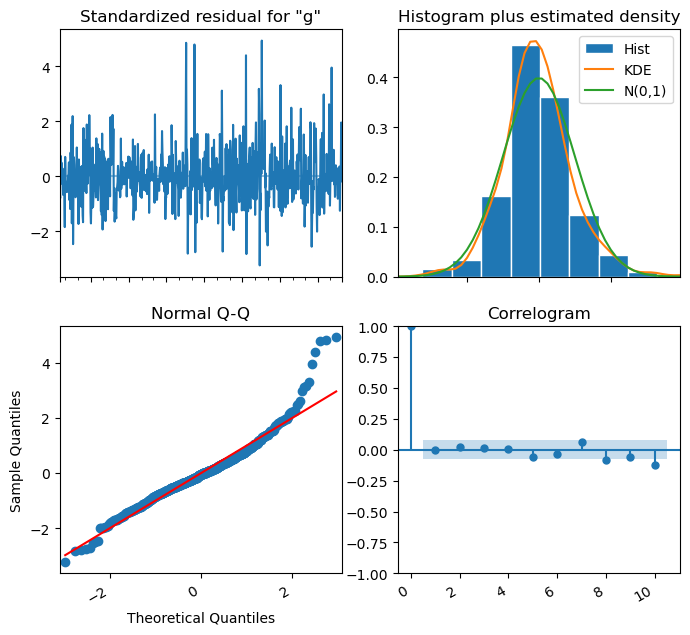

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.78768D-01    |proj g|=  9.17148D-02

At iterate    5    f=  9.34024D-01    |proj g|=  1.28112D-01

At iterate   10    f=  9.25824D-01    |proj g|=  4.01361D-03

At iterate   15    f=  9.25489D-01    |proj g|=  4.45778D-02


 This problem is unconstrained.



At iterate   20    f=  9.23078D-01    |proj g|=  3.30932D-01

At iterate   25    f=  9.19781D-01    |proj g|=  5.96980D-02

At iterate   30    f=  9.19688D-01    |proj g|=  2.76403D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     51      1     0     0   1.772D-05   9.197D-01
  F =  0.91968713778031741     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


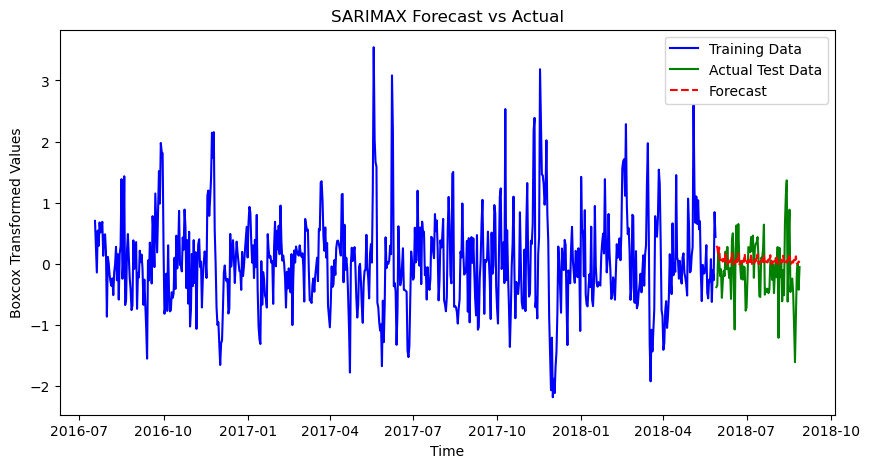

MAE: 0.37589595925313746


In [215]:

# Ensure datetime index
train_df.index = pd.to_datetime(train_df.index)

# Define SARIMA parameter ranges
p_values = range(0, 3)
d_values = [1] 
q_values = range(0, 3)
P_values = range(0, 2)
D_values = [0]
Q_values = range(0, 2)
m_values = [7,14]  

# Generate all parameter combinations
param_combinations = list(itertools.product(
    p_values, d_values, q_values, P_values, D_values, Q_values, m_values))

# Initialize best AIC tracker
best_aic = float("inf")
best_params = None

# Grid search
for params in param_combinations:
    order = params[:3]
    seasonal_order = params[3:]
    try:
        model = sm.tsa.SARIMAX(train_df, order=order, seasonal_order=seasonal_order)
        result = model.fit(disp=0)  # Ensure proper fitting
        
        aic = result.aic
        if result.mle_retvals['converged']:  # Check if the model converged
            print(order, seasonal_order, aic)
            if aic < best_aic:
                best_aic = aic
                best_params = params
        else:
            print(order, seasonal_order, 'not converged')

    except Exception as e:
        print(f"Error for {params}: {e}")
        continue

# Print results
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)
model = sm.tsa.SARIMAX(train_df, order=best_params[:3], seasonal_order=best_params[3:])
result = model.fit(disp=False)
# Show the summary
result.summary()
fig = result.plot_diagnostics(figsize=(8, 8))
fig.autofmt_xdate()
plt.show()
order = (2, 1, 1)
seasonal_order = (1, 0, 1, 7)
# Fit the SARIMA model
model = sm.tsa.statespace.SARIMAX(train_df, order=order, seasonal_order=seasonal_order,
                                  enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast for the next 86 days
forecast = results.forecast(steps=92)

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(train_df.index, train_df, label='Training Data', color='blue')
plt.plot(test_df.index, test_df, label='Actual Test Data', color='green')
plt.plot(test_df.index, forecast, label='Forecast', color='red', linestyle='dashed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Boxcox Transformed Values')
plt.title('SARIMAX Forecast vs Actual')
plt.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Calculate error metrics
mae = mean_absolute_error(test_df, forecast)
rmse = np.sqrt(mean_squared_error(test_df, forecast))
mape = np.mean(np.abs((test_df - forecast) / test_df)) * 100

print(f"MAE: {mae}")

ARIMA(0, 0, 0) AIC: 1553.9137837509743
ARIMA(0, 0, 1) AIC: 1358.8707576319293
ARIMA(0, 0, 2) AIC: 1311.4210131303817
ARIMA(0, 0, 3) AIC: 1297.6286489980453
ARIMA(0, 0, 4) AIC: 1286.5945061871796
ARIMA(0, 1, 0) AIC: 1445.391717423137
ARIMA(0, 1, 1) AIC: 1388.4732200506403
ARIMA(0, 1, 2) AIC: 1367.32573912476
ARIMA(0, 1, 3) AIC: 1315.866915037247
ARIMA(0, 1, 4) AIC: 1301.8596029459497
ARIMA(1, 0, 0) AIC: 1287.4775522022292
ARIMA(1, 0, 1) AIC: 1288.7586708095587
ARIMA(1, 0, 2) AIC: 1290.597576049456
ARIMA(1, 0, 3) AIC: 1291.1166503643396
ARIMA(1, 0, 4) AIC: 1288.5636542602451
ARIMA(1, 1, 0) AIC: 1406.956742494243
ARIMA(1, 1, 1) AIC: 1291.4206336816162
ARIMA(1, 1, 2) AIC: 1292.6335659162705
ARIMA(1, 1, 3) AIC: 1294.492478113458
ARIMA(1, 1, 4) AIC: 1311.42987244844
ARIMA(2, 0, 0) AIC: 1288.722910039635
ARIMA(2, 0, 1) AIC: 1290.6949551928942
ARIMA(2, 0, 2) AIC: 1292.7157150643486
ARIMA(2, 0, 3) AIC: 1291.541503267796
ARIMA(2, 0, 4) AIC: 1281.397298795776
ARIMA(2, 1, 0) AIC: 1392.003916117451

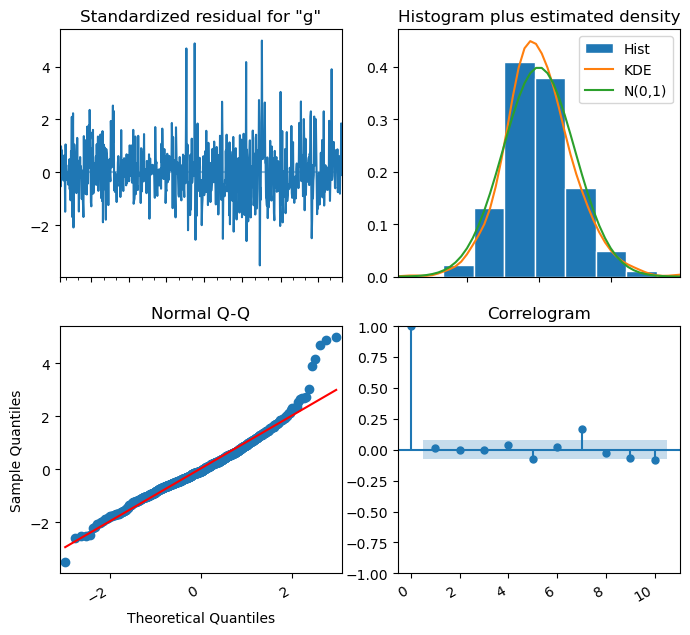

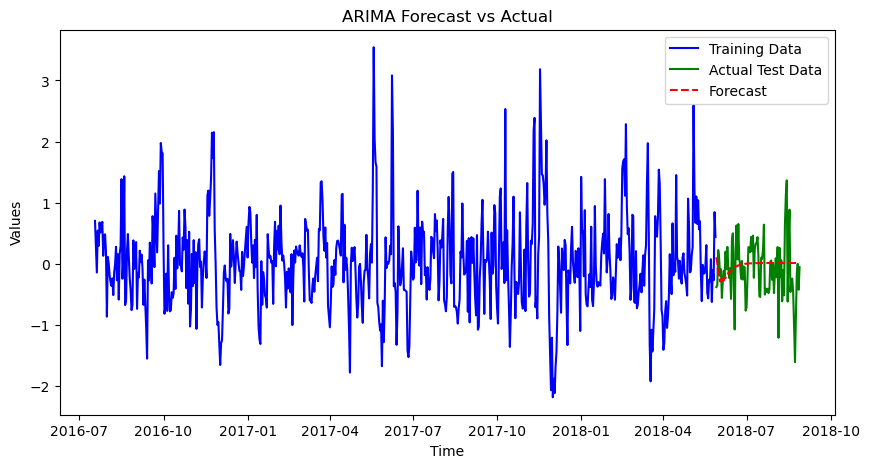

MAE: 0.37063349589740385


In [133]:
import itertools
import math
import statsmodels.api as sm
import pandas as pd

# Ensure datetime index
train_df.index = pd.to_datetime(train_df.index)

# Define ARIMA parameter ranges
p_values = range(0, 5)  # AR (Auto-regression) terms
d_values = range(0, 2)   # Differencing to make the series stationary
q_values = range(0, 5)  # MA (Moving Average) terms

# Generate all parameter combinations
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize best AIC tracker
best_aic = float("inf")
best_params = None

# Grid search for ARIMA
for params in param_combinations:
    try:
        # Fit the ARIMA model
        model = sm.tsa.ARIMA(train_df, order=params)
        result = model.fit()  # Fit model without disp

        aic = result.aic
        print(f"ARIMA{params} AIC: {aic}")
        
        if aic < best_aic:
            best_aic = aic
            best_params = params
            
    except Exception as e:
        print(f"Error for {params}: {e}")
        continue

# Print results
print("Best ARIMA Parameters:", best_params)
print("Best AIC:", best_aic)
order = best_params  # ARIMA(p, d, q) from grid search
model = sm.tsa.ARIMA(train_df, order=order)
result = model.fit()

# Show the summary
print(result.summary())

# Plot diagnostics
fig = result.plot_diagnostics(figsize=(8, 8))
fig.autofmt_xdate()
plt.show()

# Forecast for the next 178 days
forecast = result.forecast(steps=92)

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(train_df.index, train_df, label='Training Data', color='blue')
plt.plot(test_df.index, test_df, label='Actual Test Data', color='green')
plt.plot(test_df.index, forecast, label='Forecast', color='red', linestyle='dashed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('ARIMA Forecast vs Actual')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(test_df, forecast)
rmse = np.sqrt(mean_squared_error(test_df, forecast))
mape = np.mean(np.abs((test_df - forecast) / test_df)) * 100

print(f"MAE: {mae}")

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0539 
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0171
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0218
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0186
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0166
Epoch 16/50
21/21 

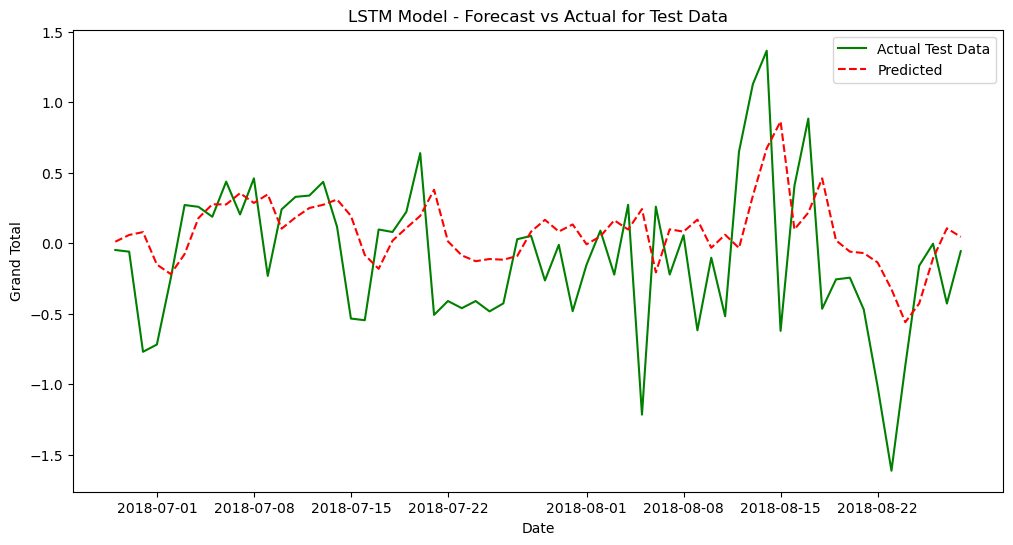

MAE for Test Data: 0.39194646283468176


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'train_df' and 'test_df' are already provided

# Check for missing values and remove if needed
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_df['grand_total'] = train_df.to_frame()  
test_df['grand_total'] = test_df.to_frame()  

# Scaling the data using MinMaxScaler (scaling to range [0, 1])
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit scaler on the training data and transform both train and test
train_scaled = scaler.fit_transform(train_df['grand_total'].values.reshape(-1, 1))
test_scaled = scaler.transform(test_df['grand_total'].values.reshape(-1, 1))

# Convert the data into a format suitable for LSTM [samples, time_steps, features]
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])  # Input features
        y.append(data[i + time_step, 0])  # Target variable (next time step value)
    return np.array(X), np.array(y)

# Define the time step (the number of previous days to use to predict the next day)
time_step = 30  # You can experiment with different time_steps

# Create the dataset for training and testing
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape the input for LSTM [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer (forecast the next value)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict the values for the test set
predictions_scaled = model.predict(X_test)

# Inverse transform the predicted and actual values to get them back to the original scale
predictions = scaler.inverse_transform(predictions_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compare predicted values with actual test values
actual_values = y_test_actual.flatten()
predicted_values = predictions.flatten()

# Visualize the actual vs predicted values
plt.figure(figsize=(12, 6))

# Make sure to align the length of the actual and predicted values
plt.plot(test_df.index[time_step:len(actual_values)+time_step], actual_values, label='Actual Test Data', color='green')
plt.plot(test_df.index[time_step:len(predicted_values)+time_step], predicted_values, label='Predicted', color='red', linestyle='dashed')

plt.title("LSTM Model - Forecast vs Actual for Test Data")
plt.xlabel('Date')
plt.ylabel('Grand Total')
plt.legend()
plt.show()

# Calculate and print error metrics for comparison
mae = mean_absolute_error(actual_values, predicted_values)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

print(f"MAE for Test Data: {mae}")
